# The Cities of Tomorrow: Urban Sustainability Analysis 🏙️🌿

## 1. Introduction
As the world urbanizes, cities face the critical challenge of balancing population density with environmental quality. In this analysis, we explore the **Sustainable Urban Planning Dataset** to uncover what drives a high **Urban Sustainability Score**.

**Objective:**
Using Python, we will:
1.  **Clean** the raw data.
2.  **Visualize** the relationship between Green Cover, Air Quality, and Sustainability.
3.  **Cluster** cities into distinct archetypes using K-Means Machine Learning.

> *Data Source: Sustainable Urban Planning & Landscape Dataset*

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files

# Set visual style for the notebook
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries Loaded. Ready to upload data.")

Libraries Loaded. Ready to upload data.


In [2]:
# 2. Upload Data
print("Please upload 'sustainable_urban_planning.csv':")
uploaded = files.upload()

# Automatically get the filename
filename = next(iter(uploaded))
df = pd.read_csv(filename)
print(f"✅ Dataset '{filename}' loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

Please upload 'sustainable_urban_planning.csv':


Saving urban_planning_dataset.csv to urban_planning_dataset.csv
✅ Dataset 'urban_planning_dataset.csv' loaded with 3476 rows and 16 columns.


## 2. Data Cleaning & Preparation 🧹
Real-world data is rarely perfect. To ensure accurate modeling, we must handle missing values and duplicate entries.

**Steps taken:**
* Filled missing numeric values with the **Median** (to avoid skewing from outliers).
* Removed duplicate rows to ensure uniqueness.

In [3]:
# 3. Data Cleaning
# Fill missing values with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop duplicates
df = df.drop_duplicates()

# Display refined data
print("Data Cleaned.")
display(df.head())

Data Cleaned.


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


## 3. Exploratory Data Analysis (EDA) 🔍
Now we dive into the metrics. We want to answer: **Does nature really make a city more sustainable?**

We will visualize the relationship between **Green Cover %** and the **Urban Sustainability Score**, while also factoring in **Air Quality**.

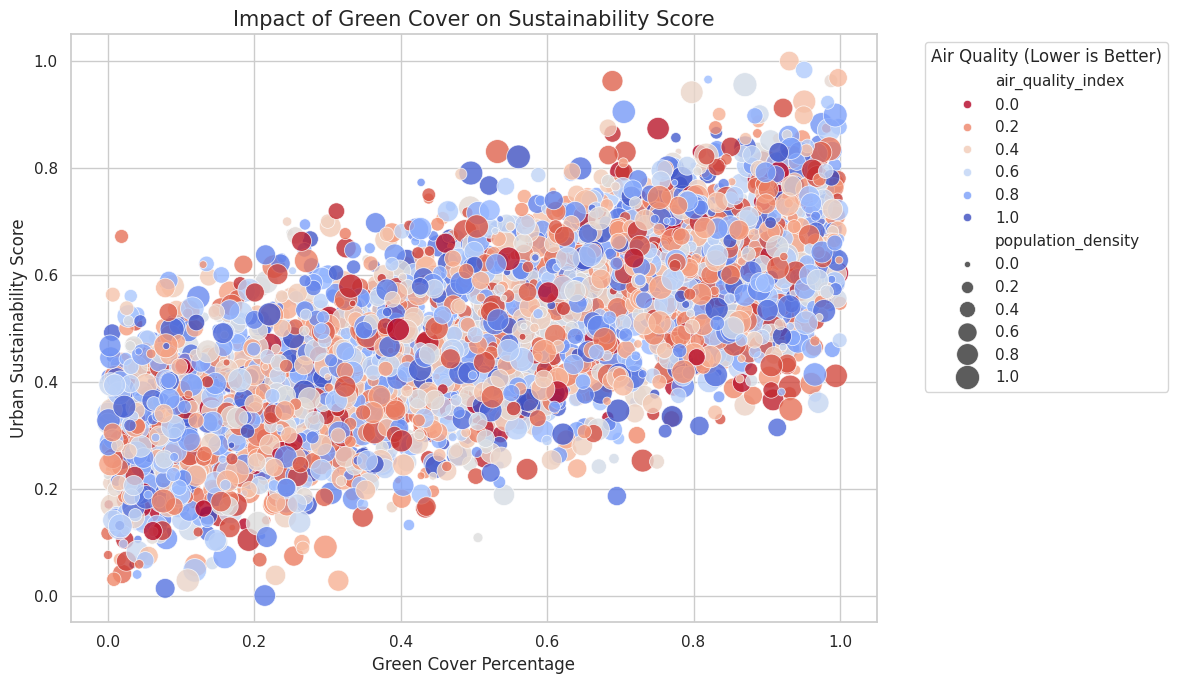

In [4]:
# 4. Visualization: Green Cover vs Sustainability
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='green_cover_percentage',
    y='urban_sustainability_score',
    hue='air_quality_index',
    palette='coolwarm_r', # Red = Bad Air, Blue = Good Air
    size='population_density',
    sizes=(20, 300),
    alpha=0.8
)

plt.title("Impact of Green Cover on Sustainability Score", fontsize=15)
plt.xlabel("Green Cover Percentage", fontsize=12)
plt.ylabel("Urban Sustainability Score", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Air Quality (Lower is Better)")
plt.tight_layout()
plt.show()

### 💡 Insights from EDA
The scatter plot reveals a clear trend: **Cities with higher Green Cover Percentages tend to have higher Sustainability Scores.**

Furthermore, the color gradient shows that cities with low green cover (left side) suffer from higher Air Quality Index values (worse pollution), proving that urban vegetation is a key filter for city air.

## 4. Advanced Analysis: Clustering Archetypes 🧠
We will now use **K-Means Clustering** (Unsupervised Machine Learning) to categorize cities into groups based on their performance.

**Features used for clustering:**
1.  Green Cover %
2.  Air Quality Index
3.  Population Density
4.  Public Transport Access

/tmp/ipython-input-3496236563.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='urban_sustainability_score', data=df, palette="viridis")


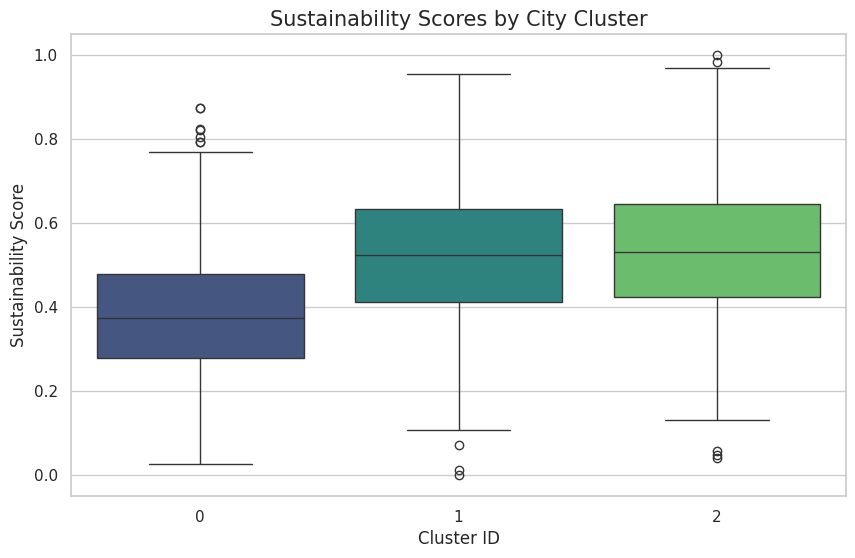

In [5]:
# 5. Machine Learning: K-Means Clustering

# Select features
features = ['green_cover_percentage', 'air_quality_index', 'population_density', 'public_transport_access']
X = df[features]

# Scale Data (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means (Creating 3 distinct city profiles)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='urban_sustainability_score', data=df, palette="viridis")
plt.title("Sustainability Scores by City Cluster", fontsize=15)
plt.xlabel("Cluster ID")
plt.ylabel("Sustainability Score")
plt.show()

## 5. Conclusion & The Future 🚀
Through this analysis, we identified distinct city archetypes. The data strongly supports that the "Cities of Tomorrow" must prioritize:
1.  **Integrated Green Spaces:** To boost sustainability scores and lower pollution.
2.  **Public Transport:** To manage population density without degrading air quality.

Data-driven urban planning is no longer optional; it is essential for survival.